# Network Analysis: Python Practical

In [65]:
# Import required modules
import networkx
import urllib
import numpy as np
import sys, os
from matplotlib.pyplot import figure, hist, xlabel, ylabel, title, subplot
import matplotlib.pyplot as plt

Install any modules missing using 'pip' as follows:
`>> pip install <module>`

In [ ]:
# e.g. !pip install networkx

## Network Summary

Then we save the file to a temporary location:

In [6]:
fil1=urllib.request.urlretrieve("http://www.stats.ox.ac.uk/~reinert/dtc/YeastL.net")

Import custom functions:

In [12]:
net_fp = urllib.request.urlretrieve("http://www.stats.ox.ac.uk/~reinert/dtc/extraNetwork.py",'extraNetwork.py')
sys.path.append('./')
import extraNetwork

Clean up data:

In [17]:
extraNetwork.fixNamingProblem(fil1[0])
yeast=networkx.Graph(networkx.read_pajek(fil1[0]))
yeast.remove_edges_from(yeast.selfloop_edges())
graph = yeast

In [21]:
print('Network density: {0}'.format(networkx.density(graph)))
print('Network transitivity: {0}'.format(networkx.transitivity(graph)))

Network density: 0.0023855160482128372
Network transitivity: 0.10231488638120266


In [29]:
graph1=max(networkx.connected_component_subgraphs(graph), key=len)

networkx.average_shortest_path_length(graph1)

bet = networkx.betweenness_centrality(graph1)

Histogram of the betweenness values:

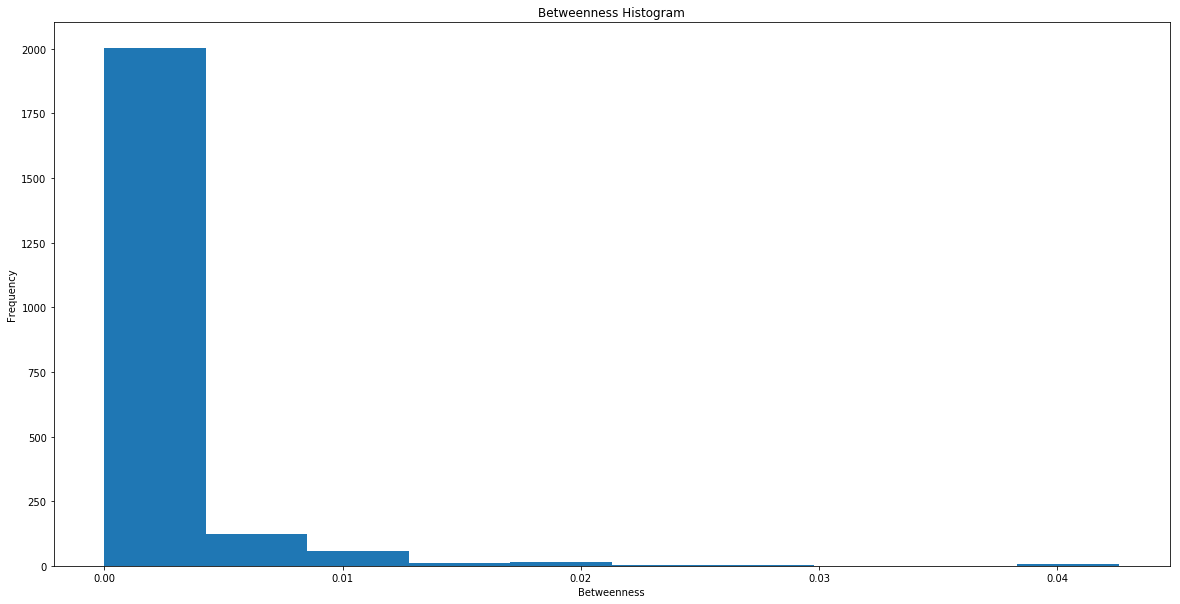

In [64]:
figure(figsize=[20,10])
hist(bet.values())
title('Betweenness Histogram')
xlabel('Betweenness')
ylabel('Frequency')
plt.show()

To see who has the highest betweenness:

In [35]:
for item in sorted(bet.items(),key=lambda x: -x[1])[0:10]:
    print(item)

('147 147 SRP1 karyopherin-alpha or importin', 0.04258287664032749)
('1443 1443 YKU80 component of DNA end-joining repair pathway', 0.04204386856149186)
('784 784 HRR25 casein kinase I, ser/thr/tyr protein kinase', 0.041822955557491076)
('566 566 RPC40 DNA-directed RNA polymerase I, III 40 KD subunit', 0.03992479117486355)
("209 209 SEC27 coatomer complex beta' chain (beta'-cop) of secretory pathway vesicles", 0.03925293064686874)
('549 549 HHF1 histone H4', 0.038569508994596484)
('302 302 CKA1 casein kinase II, catalytic alpha chain', 0.03546730849145169)
('508 508 PRP6 snRNP(U4/U6)-associated splicing factor', 0.030378739475663927)
('2022 2022 SEN15 tRNA splicing endonuclease delta subunit', 0.02725926958763792)
('120 120 BUD20 weak similarity to human zinc finger protein', 0.026195880148326744)


In [38]:
nodes=graph1.nodes()

C:\Users\james\AppData\Local\Programs\Python\Python35-32\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


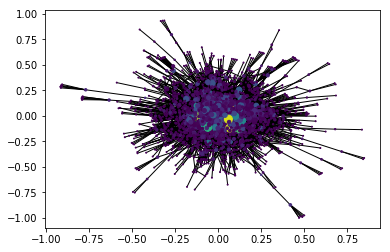

In [39]:
networkx.draw_networkx(graph1,nodelist=nodes,node_color=[bet[x] for x in nodes],
                       node_size=[len(graph[x]) for x in nodes],
                       with_labels=0)

## Generating random networks

### Erdös-Renyi graphs and mixtures

To generate an Erdös-Renyi random graph with 10,000 nodes and edge probability 1/1000, or 2/1000, we use:

In [67]:
er1 = networkx.fast_gnp_random_graph(10000, 1.0/1000.0)
er2= networkx.fast_gnp_random_graph(10000, 2.0/1000.0)

In [42]:
print('er1 transitivity: {0}'.format(networkx.transitivity(er1)))
print('er2 transitivity: {0}'.format(networkx.transitivity(er2)))

er1 transitivity: 0.0010761876355311207
er2 transitivity: 0.001884470444693785


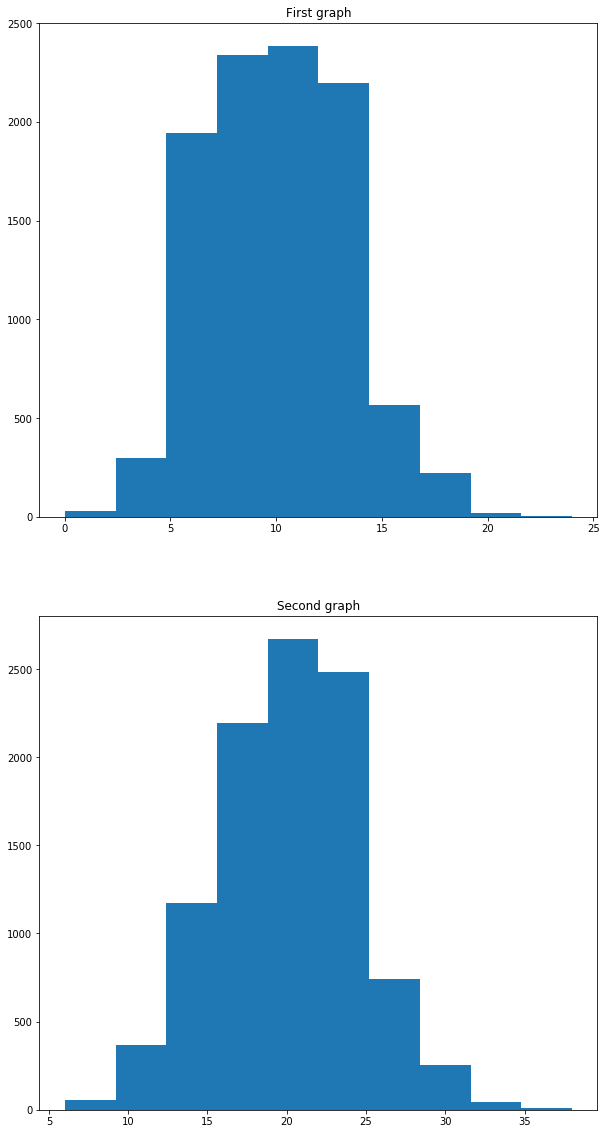

In [66]:
figure(figsize=[10,20])
f1=subplot(2,1,1)
hist(list(dict(er1.degree()).values()))
f1.set_title('First graph')
f2=subplot(2,1,2)
hist(list(dict(er2.degree()).values()))
f2.set_title('Second graph')
plt.show()

In [63]:
print('Mean: {0}'.format(np.mean(list(dict(er1.degree()).values()))))
print('Mean: {0}'.format(np.mean(list(dict(er2.degree()).values()))))


Mean: 9.9578
Mean: 19.9496


### Watts-Strogatz small worlds

For a Watts-Strogatz network we have to specify the dimension of the lattice, the number of nodes, the size of the neighbourhood, and the rewiring probability; we can use the command, where 100 is the number of nodes, 5 is the neighbourhood size, and 0.5 is the rewiring probability:

In [68]:
ws1 = networkx.random_graphs.watts_strogatz_graph(100, 5, 0.5)

### Barabasi-Albert networks

For a Barabasi-Albert network on 10,000 nodes with preferential attachment proportional to the node degree, we use:

In [78]:
bar1 = networkx.random_graphs.barabasi_albert_graph(10000,1)

For a Barabasi-Albert network on 10,000 nodes with preferential attachment proportional to the square of the node degree, networkx does not have a method to do this directly, so we modify the method to take into account the square of the node. This modifed method is included in the extraNetwork tools:

In [80]:
bar2=extraNetwork.barabasi_albert_graph_modified(m=10000, n=1, power=2)

## Monte Carlo Test

Use a network statistic to compare different networks. Here are some questions: 

*	What is the effect of choosing different parameters in a particular model? 
*	How does the average vertex degree differ in the different models? 
*	How does the global clustering coefficient vary across the models? 


Choose one of these questions and start your own examination. Test whether the statistics are statistically different in the different models using a Monte Carlo test Below is a sample Monte Carlo test code which you can adapt to your problem. 


In [84]:
n=yeast.number_of_nodes()
p = 2*yeast.number_of_edges()/float(n*(n-1))
w=[]
for run in range(49):
    G = networkx.fast_gnp_random_graph(n,p)
    w.append(networkx.transitivity(G))

yeast_trans=networkx.transitivity(yeast)
w.append(yeast_trans)
print(sorted(w).index(yeast_trans))


49


## Ego-networks

An ego-network is a network which is centered around a specific node and contains all its k-neighbours plus their connections. 
We shall use additional python code which is available at http://www.stats.ox.ac.uk/~reinert/dtc/communityDetection.py


In [88]:
urllib.request.urlretrieve("http://www.stats.ox.ac.uk/~reinert/dtc/communityDetection.py",'communityDetection.py')
import communityDetection

Obtain an ego-network for Vertex 1 of the yeast network by using:

C:\Users\james\AppData\Local\Programs\Python\Python35-32\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


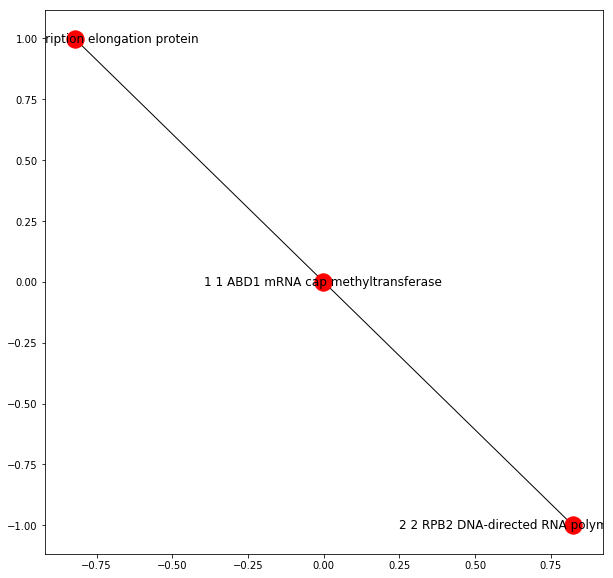

In [91]:
sortedNodes=sorted(yeast.nodes(),key=lambda x:int(x.split(' ')[0]))
node=sortedNodes[0]
sub=extraNetwork.snowballSample(yeast,[node],1)

figure(figsize=[10,10])
networkx.draw_networkx(sub)


In [92]:
# Compare ego-networks for two vertices with the same degree: 
n1=sortedNodes[1982]
n2=sortedNodes[1553]

# They both have degree 28; check:  

len(yeast[n1])
len(yeast[n2])

# Get their ego-networks as above, and plot them
Sub_n1=extraNetwork.snowballSample(yeast,[n1],1)
Sub_n2=extraNetwork.snowballSample(yeast,[n2],1)


C:\Users\james\AppData\Local\Programs\Python\Python35-32\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


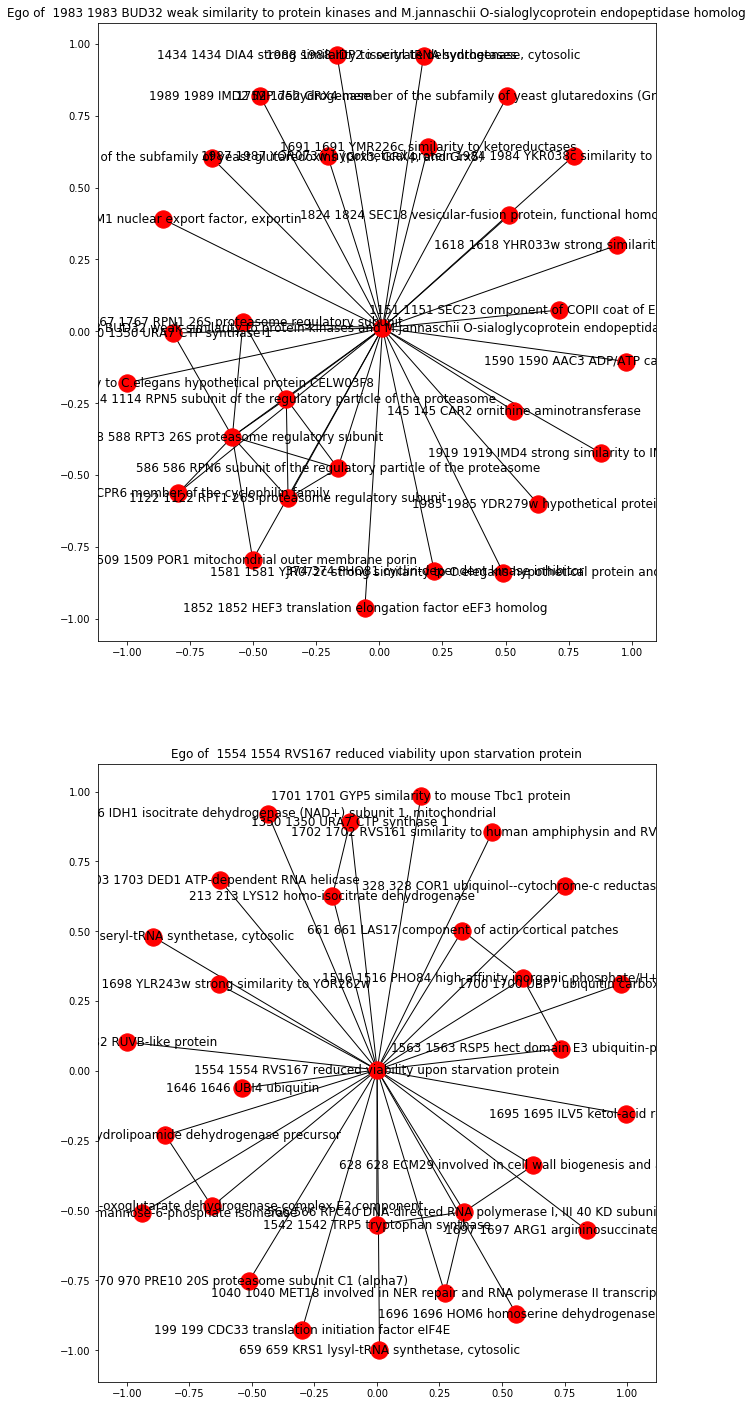

In [95]:
figure(figsize=[10,25])
f1=subplot(2,1,1)
f1.set_title('Ego of  '+n1)
networkx.draw_networkx(Sub_n1)
f2=subplot(2,1,2)
f2.set_title('Ego of  '+n2)
networkx.draw_networkx(Sub_n2)


We can repeat the procedure for second neighbours of the first vertex we considered.  

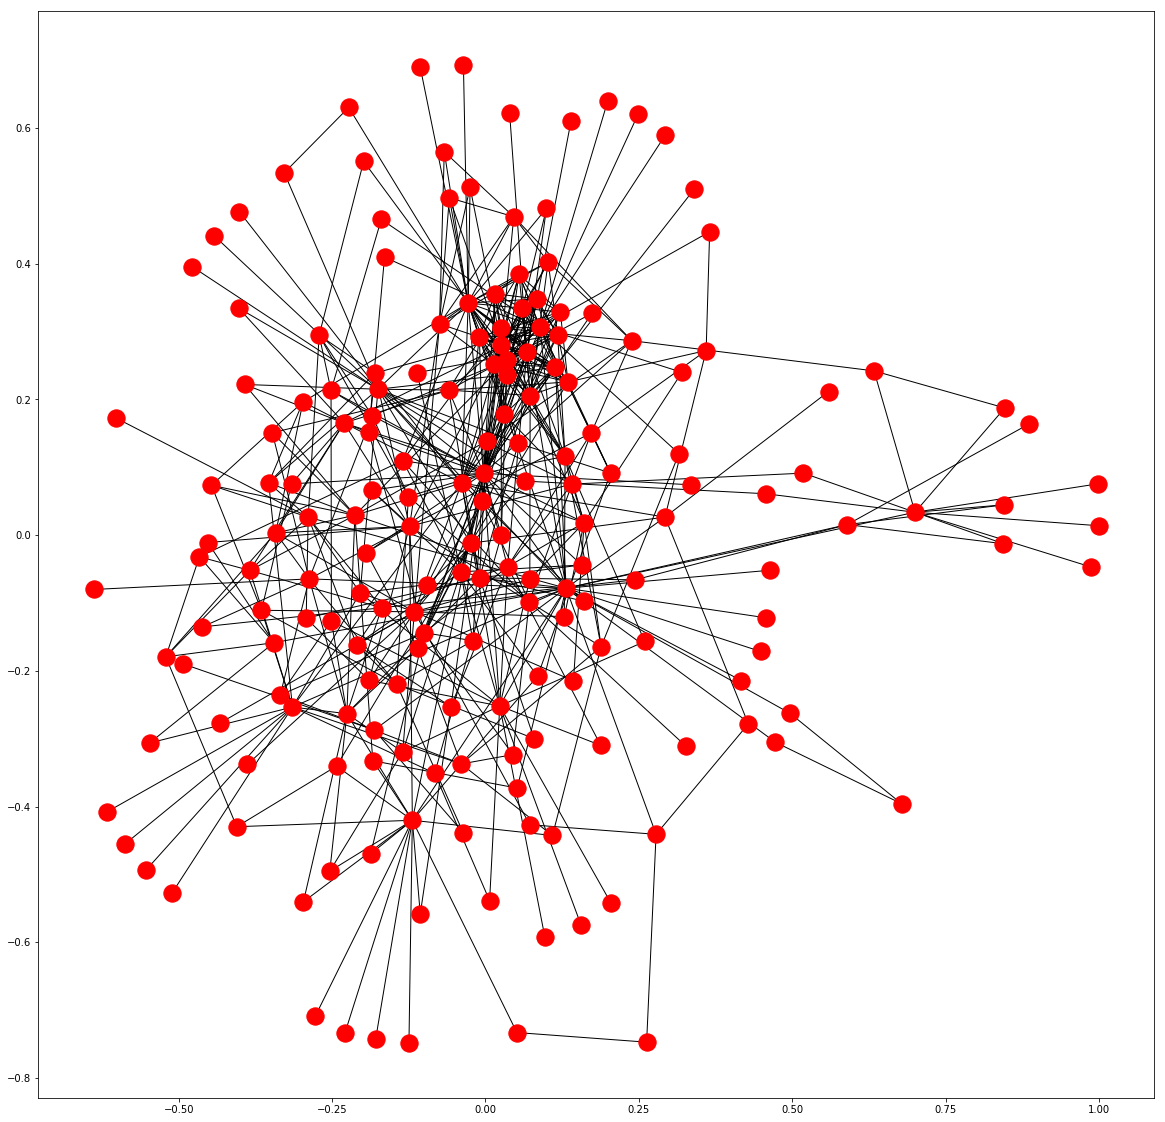

In [102]:
Sub2=extraNetwork.snowballSample(yeast,[n1],2)
figure(figsize=[20,20])
networkx.draw_networkx(Sub2, with_labels=0)

Look at the 2-hop ego network for Vertex 1554

In [ ]:
Sub2_n2=extraNetwork.snowballSample(yeast,[n2],2)

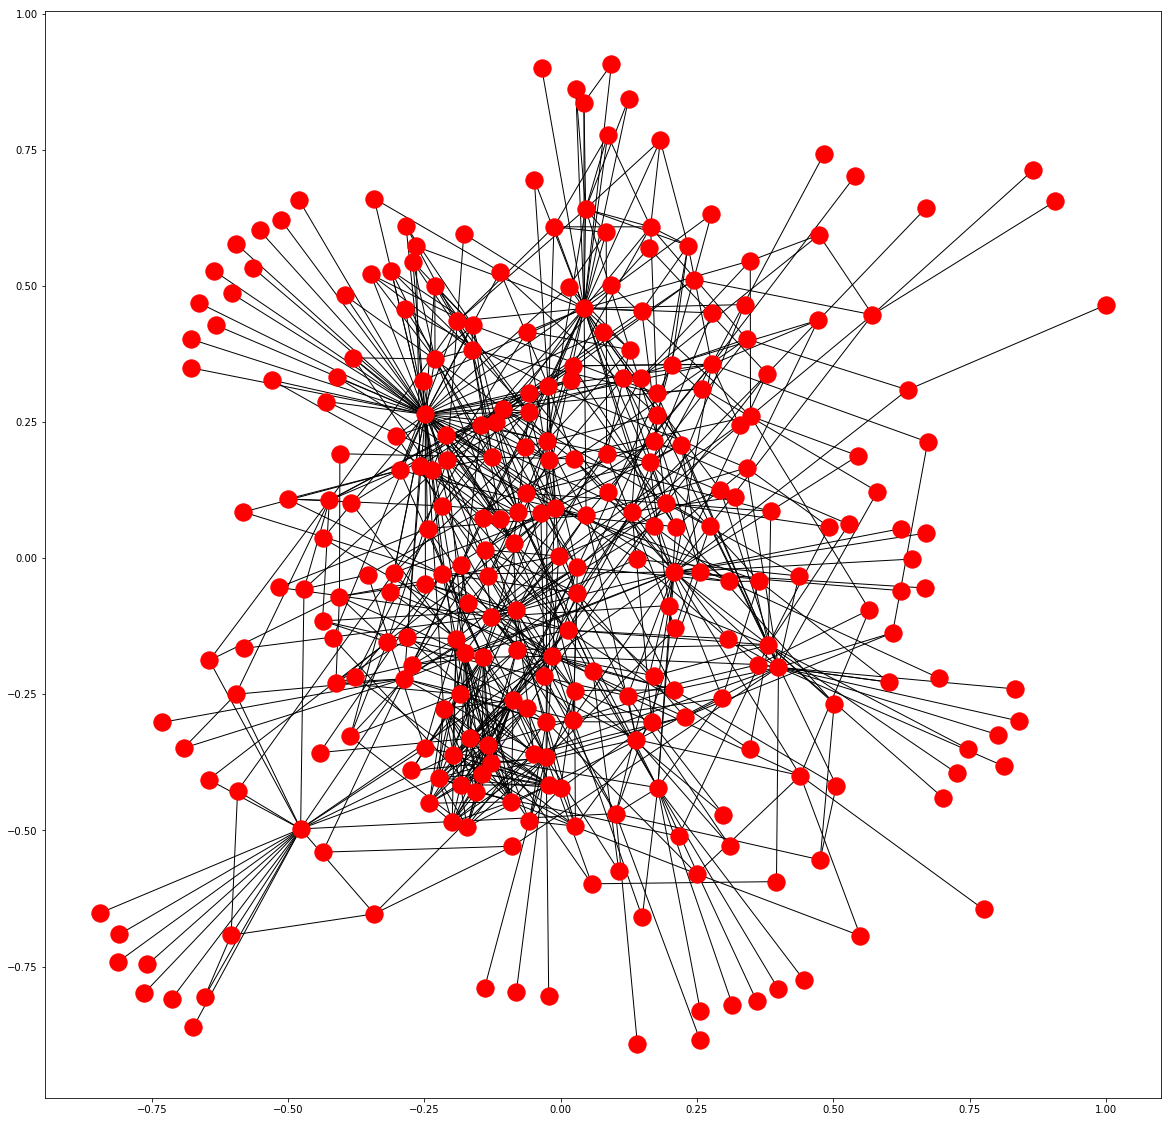

In [101]:
figure(figsize=[20,20])
networkx.draw_networkx(Sub2_n2, with_labels=0)

## Subgraph Counts 

In [103]:
res3=extraNetwork.checkMotifs(yeast, 3)

The result is a list of tuples, with the first element of each tuple the subgraph of interest and the second the number observed in each graph. Observe the difference in the number of complete graphs with the number of 2 stars.
Now try for 4:


In [104]:
res4=extraNetwork.checkMotifs(yeast, 4)

##  Community Detection 

For community detection we start with a connected network. To find the largest connected component of a graph use the following command:
yeast1=max(networkx.connected_component_subgraphs(yeast), key=len)

Networkx does not come with a set of good community detection methods, so Andrew Elliott has written a small amount of extra code that to give the extra functionality. This is in the file http://www.stats.ox.ac.uk/~reinert/dtc/communityDetection.py which you have downloaded. Import the function using the following command:


In [106]:
import communityDetection as comDet
import networkx as nx
